Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory
## Trabalho 2.2 - Análise dinâmica de um modelo estrutural com múltiplos graus de liberdade

Nome: Vinícius André Tochetto

Matrícula: 00312166




In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc



# 1. Frequência natural e modos de vibração 

Com a matriz de rigidez e a matriz de massa, é possível calcular a frequência natural da estrutura e os modos de vibração, sendo que a estrutura proposta é um pórtico plano de 4 m de largura, 40 metros de altura e 4 metros de distância para cada pavimento. As seções transversais das barras foram definidas como 200x200 mm e o material utilizado foi o concreto que possui um módulo de elasticidade “E” de aproximadamente 25000 MPa. O pórtico modelado está representado na figura abaixo. 

<img src= "Data 2/Portico.png" alt="Portico" width="200px"/>

Aplicou-se cargas de 1 kN em cada um dos nós e avaliou-se os deslocamentos que ocorrem nos mesmos. Como a estrutura possui 11 nós, sendo 10 ativos, a matriz de flexibilidade será uma matriz de 10x10. A figura abaixo mostra o procedimento realizado.

<img src= "Data 2/Portico2.png" alt="Portico2" width="200px"/>

In [68]:
# Coeficientes de flexibilidade em m/N
H1 = np.array([[12.5, 11.3, 9.91, 8.55, 7.23, 5.94, 4.68, 3.47, 2.33, 1.21], 
               [11.3, 10.8, 9.64, 8.36, 7.08, 5.84, 4.62, 3.44, 2.31, 1.21], 
               [9.91, 9.68, 9.27, 8.16, 6.94, 5.73, 4.55, 3.40, 2.29, 1.21], 
               [8.55, 8.36, 8.15, 7.84, 6.79, 5.63, 4.49, 3.36, 2.28, 1.21], 
               [7.23, 7.08, 6.94, 6.78, 6.53, 5.53, 4.42, 3.33, 2.26, 1.20],
               [5.63, 5.83, 5.73, 5.63, 5.53, 5.30, 4.35, 3.29, 2.24, 1.20],
               [4.68, 4.61, 4.55, 4.49, 4.43, 4.35, 4.17, 3.25, 2.23, 1.20],
               [3.47, 3.44, 3.40, 3.36, 3.33, 3.29, 3.26, 3.10, 2.21, 1.20],
               [2.33, 2.31, 2.29, 2.28, 2.26, 2.25, 2.23, 2.21, 2.08, 1.20], 
               [1.21, 1.21, 1.21, 1.21, 1.20, 1.20, 1.20, 1.19, 1.18, 1.21]])*1e-6   


In [69]:
# Coeficientes de rigidez em N/m
K1 = np.linalg.inv(H1) 



Elaborou-se uma matriz de massa da estrutura, que consiste em uma matriz com a diagonal principal formada pelo peso de cada pavimento. A massa foi calculada levando em consideração um peso de 400 kg/m³ para o material empregado na estrutura. A estrutura possui 39 barras de seção transversal de 20x20 cm, todas com 4 metros de comprimento, sendo assim calcula-se o peso total da estrutura e monta-se a matriz de massa.

P = [(4x4)x40] x 400 = 256000/10 = 25600,0 kg.  

In [70]:
# Matriz de massa em kg
M1 = np.array([[2.56, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
               [0.00, 2.56, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 2.56, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 2.56, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 0.00, 2.56, 0.00, 0.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 0.00, 0.00, 2.56, 0.00, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.56, 0.00, 0.00, 0.00],
               [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.56, 0.00, 0.00],
               [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.56, 0.00],
               [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.56]])*1e4


In [71]:
w2, phi = sc.eig(K1,M1)

print(w2)

print(phi)

[298.57576205+29.88476423j 298.57576205-29.88476423j
 217.96791158 +0.j         144.19977965 +0.j
 100.07282872 +0.j          75.97484924 +0.j
  43.97440302 +0.j           0.74171723 +0.j
  20.94116222 +0.j           6.77257608 +0.j        ]
[[-0.02172883-0.09183332j -0.02172883+0.09183332j  0.07024586+0.j
  -0.17416295+0.j          0.33176735+0.j         -0.37658608+0.j
   0.32285217+0.j          0.45614849+0.j         -0.37069341+0.j
  -0.42817764+0.j        ]
 [ 0.0145244 +0.21932894j  0.0145244 -0.21932894j -0.13384494+0.j
   0.19645064+0.j         -0.25447456+0.j          0.17516219+0.j
   0.0083874 +0.j          0.43627752+0.j         -0.17381973+0.j
  -0.32294171+0.j        ]
 [ 0.09428298-0.21011299j  0.09428298+0.21011299j  0.02012873+0.j
   0.18704626+0.j         -0.46435601+0.j          0.53399006+0.j
  -0.34726235+0.j          0.40870909+0.j          0.11317748+0.j
  -0.16774056+0.j        ]
 [-0.25312111+0.08444091j -0.25312111-0.08444091j  0.19424714+0.j
  -0.33808658+0.j

In [72]:
w2, phi1 = sc.eig(K1, M1)

iw = w2.argsort()
w2 = w2[iw]
Phi1 = phi1[:,iw]

wk1 = np.sqrt(np.real(w2))
fk1 = wk1/2/np.pi


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


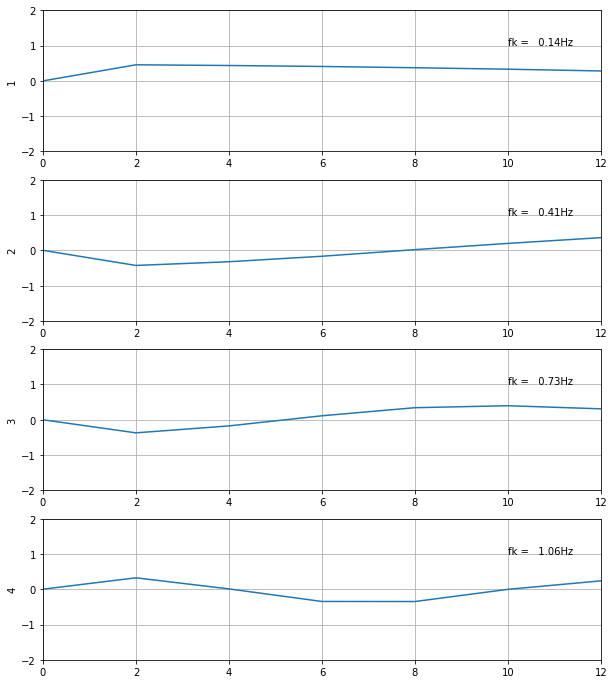

In [73]:
# Visualização dos modos de vibrações
plt.figure(1, figsize=(10,40))
x = np.arange(0,24,2)

for k in range(4):
    pk = np.zeros(12)
    pk[1:-1] = Phi1[:,k]
    pm = np.max(np.abs(pk))
    
    plt.subplot(13,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 12.0);
    plt.ylim(-2,  2);  plt.ylabel(str(k+1));
    plt.text(10, 1, 'fk = {0:6.2f}Hz'.format(fk1[k]));
    plt.grid(True)


# 2. Resposta estrutural para um impacto

Aplicou-se uma força "F" de 100 kN atuante em um intervalo de tempo Td, utilizando o efeito da resposta impulsiva, considerando o impulso como uma velocidade inicial da estrutura. 

In [74]:
fmax = np.max(fk1)
print(fmax)
F = 100000
Tn = 1/fmax
td = Tn/4
m = 30000
v0 = (F*td)/m
print(v0)
v0_v = [v0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
u0_v = np.zeros(10)


2.750093162865059
0.3030200374976254


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


0.002302051533621258


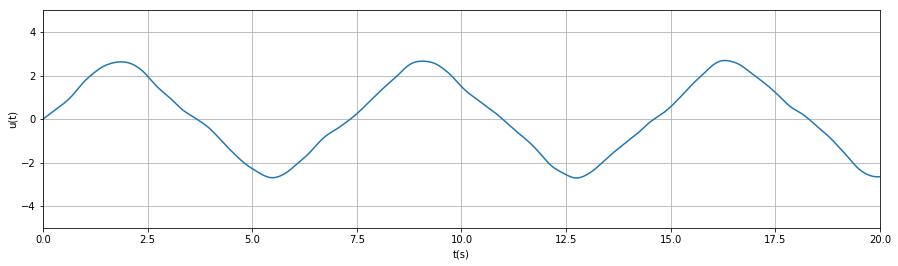

In [86]:
Phit = Phi1.transpose()   
xi = np.pi/2
UMAX = np.zeros(10)
    
for k in range (10):
    Mi = np.dot(np.dot(Phit[k], M1), phi[k])
    umax = (np.dot(np.dot(Phit[k], M1),v0_v)) / (wk1[k]*np.sin(xi)*Mi)
    
    UMAX[k] = umax
    
t = np.linspace(0,20,1000)
uk = np.zeros((10,1000))
for k in range(10):
    
    uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(phi, uk)
plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:])
plt.xlim(0.0, 20.0); plt.xlabel('t(s)');
plt.ylim(-5, 5); plt.ylabel('u(t)');
plt.grid(True)

print (UMAX[k])


# 3. Amortecimento 

O amortecimento foi calculado como uma combinação da matriz de massa e matriz de rigidez. 

In [77]:
zeta = np.zeros(10)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2
for k in range (8):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print(zeta)


[0.01       0.01       0.01082107 0.01749558 0.02391002 0.02778811
 0.03375846 0.04188375 0.04925453 0.04925453]
